# Instrukcja - Transformacja Hougha

### Cel:
- zapoznanie z transformacją Hougha dla pojedynczego punktu,
- kilku punktów, prostych figur
- wykorzystanie transformacji Hougha do detekcji linii prostych na rzeczywistym obrazie
- transformacja Hougha w przestrzeni ab

### Transformacja Hough'a

Transformacja Hougha dla prostych jest metodą detekcji współliniowych punktów. Każda prosta może być jednoznacznie przedstawiona za pomocą dwóch parametrów. Przestrzeń tych parametrów to przestrzeń Hougha. Najczęściej wykorzystywanymi parametrami w tej metodzie są współczynniki ρ,θ

opisujące równanie prostej w postaci normalnej:

ρ=x⋅cos(θ)+y⋅sin(θ)

gdzie: ρ - promień wodzący, θ - kąt pomiędzy ρ a osią OX.

Własności transformacji Hougha:
- prostej w przestrzeni kartezjańskiej odpowiada punkt w przestrzeni Hougha
- pękowi prostych przechdzących przez punkt w przestrzeni kartezjańskiej odpowiada krzywa sinusoidalna w przestrzeni Hougha
- punkty leżące na tej samej prostej (w przestrzeni kartezjańskiej) korespondują z sinusoidami przechodzącymi przez wspólny punkt w przestrzeni Hougha.

Metoda wyliczania transformacji Hougha składa się z następujących kroków:
- przez każdy badany (różny od zera) punkt obrazu prowadzony jest pęk prostych, przechodzących przez ten punkt
- każda z tych prostych transformowana jest do przestrzeni Hougha i tworzy tam punkt o współrzędnych ρ,θ
- w ten sposób, każdy punkt obrazu pierwotnego (pęk prostych) jest odwzorowany w sinusoidalną krzywą w przestrzeni Hougha

Przestrzeń Hougha jest przestrzenią akumulacyjną tzn. punkty sinusoidalnych krzywych, wygenerowanych dla punktów obrazu pierwotnego dodają się w miejscach, w których krzywe te przecinają się. Powstałe w ten sposób (w przestrzeni Hougha) maksima odpowiadają zbiorom punktów, należących do jednej prostej. Współrzędne ρ,θ
tego maksimum jednoznacznie określają położenie prostej na obrazie pierwotnym.

### Transformacja Hougha dla małej liczby punktów.
   1. Uruchom poniższy kod. W tablicy `im` wskaż jeden punkt, dla którego ma zostać obliczona transformata.

(-0.5, 63.5, 63.5, -0.5)

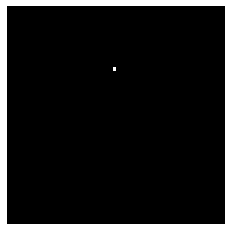

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import os

if not os.path.exists("kwadraty.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/kwadraty.png --no-check-certificate
if not os.path.exists("lab112.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/lab112.png --no-check-certificate
if not os.path.exists("dom.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/11_Hough/dom.png --no-check-certificate

im = np.zeros((64,64), dtype=np.uint8)

im[18, 31] = 1

fig, ax = plt.subplots()
fig.set_size_inches(4, 4)
ax.imshow(im, 'gray')
ax.axis('off')


3. Wykonaj transformację Hougha obazu im. Wykorzystaj funkcję *hough_line* z modułu _skimage.transform_. Funkcja zwraca: macierz H (przestrzeń Hougha) oraz dwa wektory theta i rho dla kolejnych 
4. Wyświetl przestrzeń Hougha za pomocą funkcji _plt.imshow_ (można też wykorzystać poniższą funkcję *show_hough*). Jak "wygląda" pojedynczy punkt w przestrzeni Hougha?

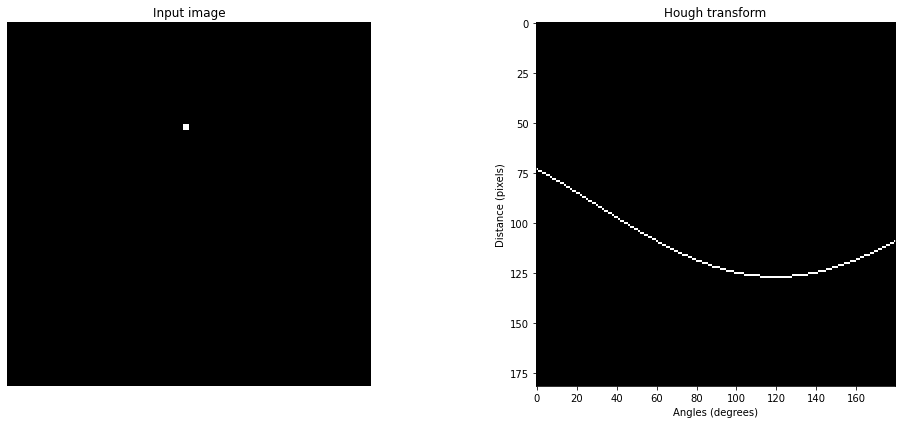

In [2]:
def show_hough(h, image):
    # Generating figure 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    ax = axes.ravel()

    ax[0].imshow(image, 'gray')
    ax[0].set_title('Input image')
    ax[0].set_axis_off()

    ax[1].imshow(h, 'gray')
    ax[1].set_title('Hough transform')
    ax[1].set_xlabel('Angles (degrees)')
    ax[1].set_ylabel('Distance (pixels)')
    ax[1].axis('image')
    
    plt.tight_layout()
    plt.show()    
    
h, theta, rho = hough_line(im)
show_hough(h,im)

5. Powtórz punkty 1-4, ale tym razem klinkij dwa punkty. Jak zmienia się przestrzeń Hougha?
6. Powtórz punkty 1-4, ale tym razem kliknij kilka punktów starając się aby były współliniowe. Zaobserwuj zmiany w przestrzeni Hougha
7. Poeksperymentuj z różnymi układami punktów

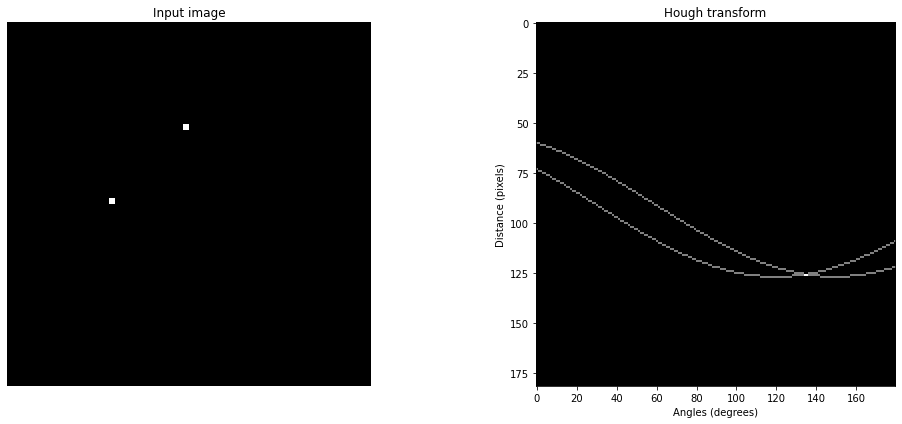

In [3]:
im[18, 31] = 1
im[31, 18] = 1


h, theta, rho = hough_line(im)
show_hough(h,im)
im[31, 18] = 0

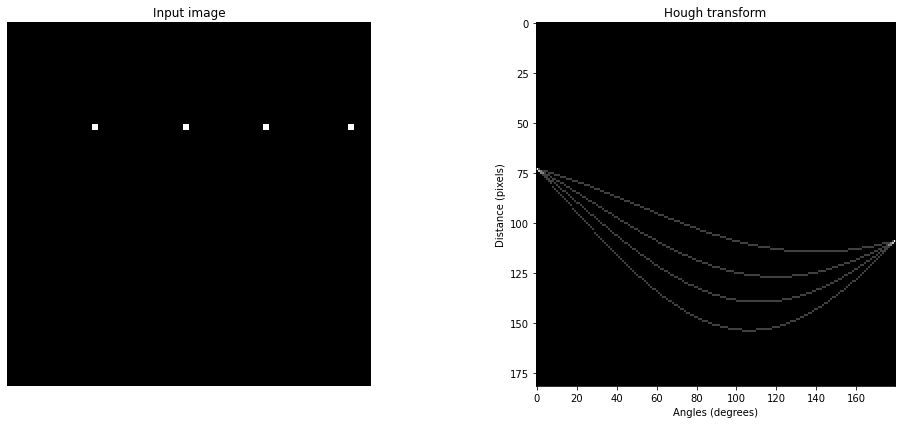

In [4]:
im[18, 15] = 1
im[18, 31] = 1
im[18, 45] = 1
im[18, 60] = 1


h, theta, rho = hough_line(im)
show_hough(h,im)

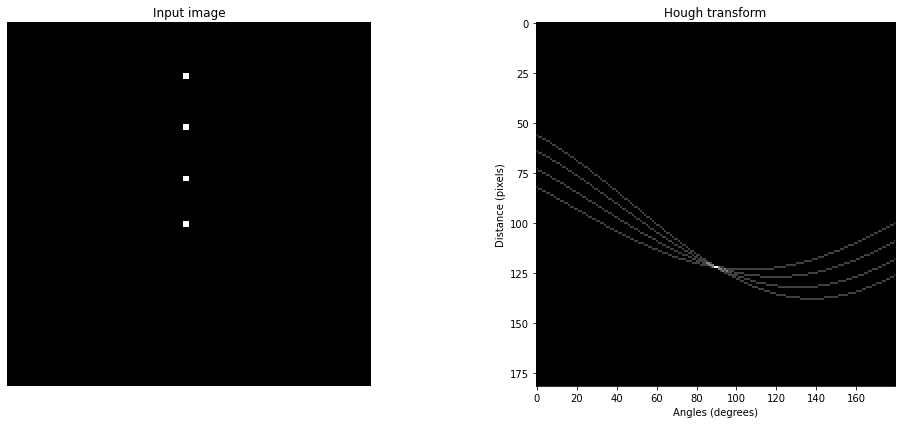

In [14]:
im[9, 31] = 1
im[18, 31] = 1
im[27, 31] = 1
im[35, 31] = 1


h, theta, rho = hough_line(im)
show_hough(h,im)

### Transformata Hougha dla pojedynczego obiektu

W tym podpunkcie pokazane zostanie praktycznie wykorzystanie transformaty Hougha - do detekcji prostych na sztucznym rysunku.

   1. Wczytaj obraz "kwadraty.png". Wyświetl go.
   2. Wykonaj detekcję krawędzi jedną z metod gradientowych. Ważne aby obraz krawędzi był jak najlepszej jakości - co oznacza cienkie (nawet niekoniecznie ciągłe) krawędzie - dla tego przypadku nie powinno być trudne do uzyskania. Wyświetl obraz po detekcji krawędzi.
   3. Wykonaj transformatę Hougha obrazu krawędziowego. Wykorzystaj funkcję *hough\_line*.
   4. Wyświetl macierz H. Czy widoczna jest taka liczba maksimów jakiej się spodziewamy?

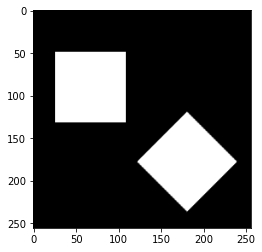

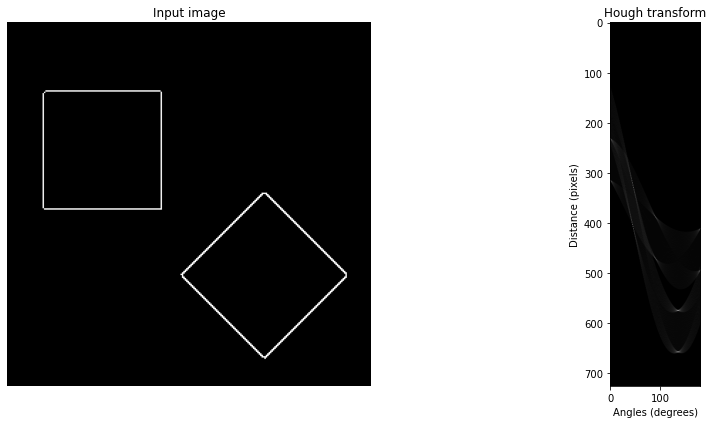

In [6]:
I = cv2.imread("kwadraty.png", cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(I,50,150,apertureSize = 3)

plt.imshow(I, 'gray')
plt.show

h, theta, rho = hough_line(edges)
show_hough(h,edges)

 5. W module skimage.transform dostępna jest funkcja do automatycznej analizy przestrzeni Hougha - wyszukiwania maksimów - *hough\_line\_peaks*. Jako parametry przyjmuje ona wyniki funkcji *hough\_line* (macierz H, theta i rho). Dodatkowo można podać próg powyżej którego punkt uznawany jest za maksimum (_threshold_ - domyslnie jest to połowa maksimum w przestrzeni H) oraz liczbę poszukiwanych maksimów (*num_peaks*). Funkcja zwraca współrzędne maksimów. Wykorzystaj funkcję *hough\_line\_peaks* do znalezienia maksimów odpowiadających krawędziom kwadratów.
 6. Wyświetl macierz H używając konstrukcji:

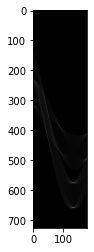

In [7]:
bestH, bestTheta, bestRho = hough_line_peaks(h, theta, rho)

fig,ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(h, 'gray') # gdzie H jest przestrzenią Hougha

Taki zapis pozwoli na dołożenie annotacji (okręgów) w miejscach znalezionych maksimów. Wyrysowanie okręgu w punkcie x, y (o rozmiarze 10, w czerwonym kolorze, bez wypełnienia środka) realizuje wywołanie: 

**circle = plt.Circle((x, y), 10, color='r', fill=False)**

natomiast dołożenie takiego okręgu do obrazu to:

**ax.add_patch(circle)**

Zaznacz maksima na obrazie wykorzystując rezultat funkcji *hough\_line\_peaks* biorąc pod uwagę, że zwraca ona kąty w radianach z przedziału od -pi/2 do pi/2, a rho z przedziału od -r/2 do r/2 gdzie r to pionowy rozmiar przestrzeni Hougha. 

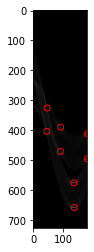

In [8]:
bestH, bestTheta, bestRho = hough_line_peaks(h, theta, rho)
bestTheta = [a*180/np.pi + 90 for a in bestTheta]
bestRho = [a+h.shape[0]/2 for a in bestRho]
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
for i in range(len(bestH)):
    circle = plt.Circle(( bestTheta[i],bestRho[i]), 10, color='r', fill=False)
    ax.add_patch(circle)
    
ax.imshow(h, 'gray')

7. Istnieje też możliwość przeprowadzenia transformacji Hougha z użyciem biblioteki OpenCV. W bibliotece znajdują się dwie wersje funkcji wyszukującej linie proste - 'klasyczna' - _HoughLines_ oraz probabilistyczna _HoughLinesP_. Zadna z nich nie zwraca przestrzeni Hougha. Wynikiem działania pierwszej jest lista parametrów prostych (krotki zawierające rho, theta). Druga zwraca krotki 4-ro elementowe ze współrzędnymi końców odcinków wykorzystanych do wylicznia parametrów (czyli znalezienia prostej). 
8. Wyznacz linie obecne na obrazie za pomocą funkcji _HoughLines_. Wykryte linie wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). Do wyświetlania linii wykorzystaj przykładowy kod:

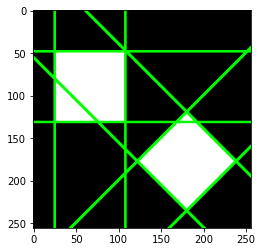

In [9]:
I = cv2.imread("kwadraty.png")
edges = cv2.Canny(I,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/20,50)
for i in range(0, 8):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))  
        cv2.line(I,(x1,y1),(x2,y2),(0,255,0),2)
    
    
plt.imshow(I)

9. Wyznacz odcinki obecne na obrazie za pomocą funkcji _HoughLinesP_. Wykryte odcinki wyrysuj na obrazie początkowym (UWAGA: wczytanym bez konwersji na graylevel). 

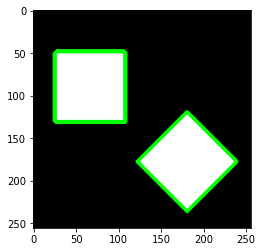

In [7]:
I = cv2.imread("kwadraty.png")
edges = cv2.Canny(I,50,150)
lines = cv2.HoughLinesP(edges,1,np.pi/20,50)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(I,(x1,y1),(x2,y2),(0,255,0),3)
    
    
plt.imshow(I)

### Transformata Hougha dla obrazu rzeczywistego.

Bazując na kodzie stworzonym w punkcie B wyszukamy linie na obrazie rzeczywistym.
   1. Wczytaj obraz "lab112.png". Wyświetl go.
   2. Wykorzystując wszystkie poznane techniki przetwarzania obrazów (filtracja, przekształcenia morfologiczne, binaryzację, detekcję krawędzi) wyodrębnij krawędzie samych kwadratów - tak aby były jak najlepszej jakości (cienkie) - jednocześnie eliminując z obrazu zakłócenia.
   3. Wykorzystaj funkcje *hough_line* i *hough_line_peaks* do detekcji linii na obrazie, a następnie np. wykorzystując kod z punktu 8 poprzedniego ustępu wyrysuj na oryginalnym obrazie znalezione linie.

<function matplotlib.pyplot.show(*args, **kw)>

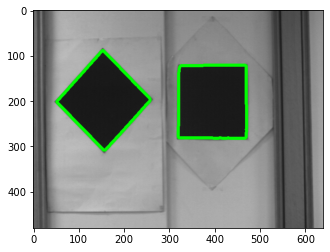

In [11]:
I = cv2.imread("lab112.png")

I2 = cv2.medianBlur(I,3,(3,3))
ret,th1 = cv2.threshold(I2,40,255,cv2.THRESH_BINARY)

I3 = cv2.dilate(th1,np.array([[1,1,1],[1,1,1],[1,1,1]], np.uint8))
I3 = cv2.morphologyEx(I3, cv2.MORPH_CLOSE,cv2.getStructuringElement(cv2.MORPH_RECT,(3,3)))

I4 = cv2.Canny(I3,0,250)

lines = cv2.HoughLinesP(I4,1,np.pi/20,0)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(I,(x1,y1),(x2,y2),(0,255,0),5)
    

plt.imshow(I)
plt.show

4. Wczytaj obraz "dom.png". Wypróbuj działanie transformacji Hougha na tym obrazie z wykorzystaniem funkcji _cv2.HoughLinesP_  (oczywiście po odpowiednich przekształceniach). Postaraj się tak przygotować obraz z krawędziami i dobrać parametry aby wyrysować na oryginalnym obrazie odcinki obejmujące zarysy domu. Weź pod uwage dodatkowe parametry funkcji, takie jak:   minLineLength, maxLineGap.

<function matplotlib.pyplot.show(*args, **kw)>

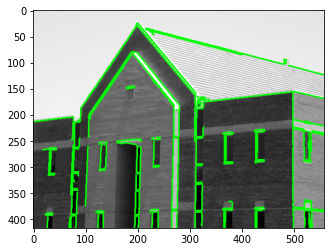

In [12]:
I = cv2.imread("dom.png")
I2 = cv2.GaussianBlur(I,(3,3),3)
C = cv2.Canny(I2, 90, 180, None, 3, 1)

lines = cv2.HoughLinesP(C,1,np.pi/180,0,50)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(I,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(I)
plt.show